# Fussing about

In [2]:
# imports
import os
from importlib import resources

import numpy as np
from scipy.io import loadmat
import h5py

import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
%matplotlib ipympl

# Load

In [4]:
mat_file = os.path.join(resources.files('oceancolor'), 'data', 'Dye',
                        'SampleHyperspectralImagerySpectra.mat')

In [5]:
mat = loadmat(mat_file)

In [7]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'bubbles', 'dye', 'wavelengths'])

# Unpack

In [9]:
mat['wavelengths'].shape

(273, 1)

In [10]:
wave = mat['wavelengths'].flatten()

## Dye

In [33]:
dye = np.zeros((5,273))
for ss in range(5):
    dye[ss,:] = mat['dye'][0][0][0].flatten()

In [21]:
mat['dye'][0][0][0].shape

(273, 1)

## Bubbles

In [32]:
bubb = np.zeros((5,273))
for ss in range(5):
    bubb[ss,:] = mat['bubbles'][0][0][0].flatten()

# Explore

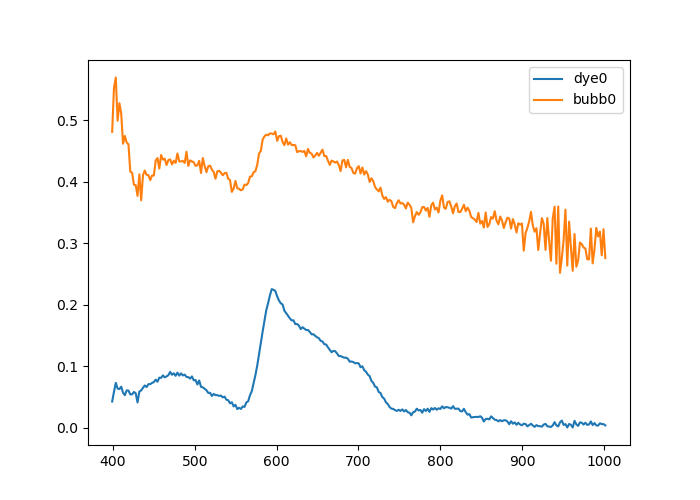

In [39]:
fig = plt.figure(figsize=(7,5))
plt.clf()
ax = plt.gca()
#
ax.plot(wave, dye[0,:], label='dye0')
ax.plot(wave, bubb[0,:], label='bubb0')

ax.legend()
plt.show()

----

# Full file

In [4]:
mat_file = os.path.join(os.getenv('OS_COLOR'), 'data', 'Dye', 
                            '20230120093344to20230120093402PST.mat')

In [5]:
f = h5py.File(mat_file, 'r')

In [6]:
f.keys()

<KeysViewHDF5 ['#refs#', '#subsystem#', 'hyperspec']>

In [7]:
f['hyperspec'].keys()

<KeysViewHDF5 ['E', 'I', 'N', 'RGB', 'lat', 'lon', 'time', 'wavelengths']>

In [8]:
f['hyperspec']['E']

<HDF5 dataset "E": shape (1540, 1254), type "<f8">

In [11]:
f['hyperspec']['I']

<HDF5 dataset "I": shape (273, 1540, 1254), type "<f4">

## Extract

In [17]:
I = f['hyperspec']['I'][:,500,500]

In [14]:
wave = f['hyperspec']['wavelengths'][:].flatten()

In [20]:
# For ease
allI = f['hyperspec']['I']

## Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


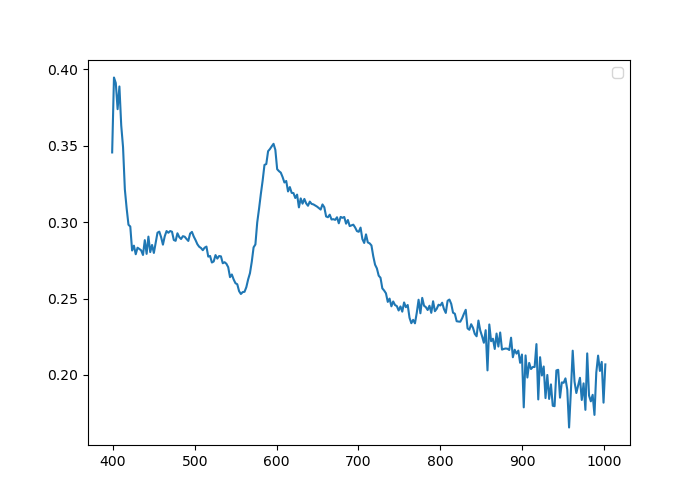

In [18]:
fig = plt.figure(figsize=(7,5))
plt.clf()
ax = plt.gca()
#
ax.plot(wave, I)#, label='I00')
#ax.plot(wave, bubb[0,:], label='bubb0')

ax.legend()
plt.show()

In [19]:
1540*1254

1931160

## Cut

In [21]:
tot = np.sum(allI, axis=0)
tot.shape

(1540, 1254)

In [22]:
keep = tot > 0.
np.sum(~keep)

456364

## The rest

In [29]:
f['hyperspec']['time'][:]

array([[3707764736,          2,          1,          1,          1,
                 1]], dtype=uint32)